# Clase 3: Lectura y análisis de información en documentos
Bienvenidos a la tercera clase, en esta ocasión vamos a estudiar la lectura y análisis de documentos de hojas de datos usando librerías. Elegimos explicar este tipo de archivos ya que manejar hojas de datos es una tarea muy común en una gran cantidad de trabajos. Además, una vez que aprenden a utilizar una librería para esta tarea, luego pueden empezar a utilizar todo tipo de librerías para manejar los archivos que necesiten.

<img src="https://icons-for-free.com/iconfiles/png/512/document+file+page+paper+programming+icon-1320165844326114116.png" width=300>

Esta clase resulta ser para muchos de las más difíciles. Les recomendamos tener paciencia con los ejercicios y animarse a probar sus ideas aunque no funcionen. Si un problema es difícil, sugerimos probar de simplificar el problema o de resolver sólo una parte del total, antes de seguir intentando. Como siempre, los desafíos no se resuelven siendo un experto, sino con perseverancia, colaboración con compañeros y prueba y error.

# Librerías



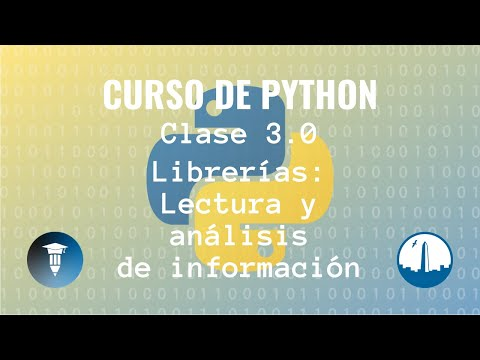

In [ ]:
# Link a Youtube: 
#Tema: Librerías: concepto, instalación, importación y ejemplos. 

from IPython.display import YouTubeVideo
YouTubeVideo('lDgVyauKnu8', width=800, height=450)       #Video Librerías

Una *librería* o *biblioteca* es un conjunto de funciones implementadas por otro programador que nos facilitan realizar tareas, principalmente porque no debemos volver a programar este código. En esta clase será vital el uso de librerías para poder analizar archivos con información.

<img src="http://www.goalexandria.com/wp-content/uploads/2016/02/alt-lib.png" width=200px>

*¿Como usamos una librería?* Primero debemos importarla:

> **import** (nombre de la libreria) **as** (nombre abreviado)

Las librerías muchas veces están separadas en distintos módulos. Podríamos decir que la librería es como un estante de libros, y en cada libro se encuentran las funciones de un tema en común, incluso un "libro" podría estar subdividido en "capítulos". Es decir, los distintos módulos de una librería podrían llegar a estar subdivididos en módulos, y cada módulo podría estar nuevamente subdividido, etc.

Si no queremos importar la librería completa, podemos importar sólo un módulo de esta forma:

> **from** (nombre de la libreria) **import** (nombre de un módulo) **as** (nombre abreviado)

También se puede usar un punto para acceder a un módulo, de esta forma:

> **import** (nombre de la libreria)**.**(nombre de un módulo) **as** (nombre abreviado)

Una vez importada la librería, podremos utilizar las funciones definidas en ella. Para poder ejecutar una función que se encuentra en una librería necesitamos especificarlo usando un punto entre el nombre de la librería y la función. La sintaxis es la siguiente:

> (nombre de la libreria)**.**función*(argumentos)*

En el caso de importar una librería que se encuentre dividida en módulos, debemos especificar el módulo correspondiente a la función nuevamente con un punto:

> (nombre de la libreria)**.**(nombre del módulo)**.**función*(argumentos)*


**Notas:**
- No es obligatorio especificar un nombre abreviado con **as**, puede utilizarse una librería con su nombre original omitiendo este comando.
- No sólo pueden importarse módulos de una librería, sino también funciones sueltas, según lo que necesiten. Siempre tengan cuidado de que los nombres de función sean únicos, si importan una función directamente entonces no podrán definir su propia función con el mismo nombre.
- Es una buena práctica que todas las librerías se importen al principio del programa, o sea que las instrucciones de **import** se encuentren arriba de todo.

In [ ]:
import math #Importamos la libreria math

print('El seno de 0 es ',math.sin(0),'y el coseno',math.cos(0))

In [ ]:
from math import sin,cos #Importamos directamente las funciones que usaremos (separadas por comas)

print('El seno de 0 es ',sin(0),'y el coseno',cos(0))

In [ ]:
import math as m

print('El seno de 0 es ',m.sin(0),'y el coseno',m.cos(0))

In [ ]:
#En este caso usamos el módulo 'path' de la librería 'os' y lo apodamos 'pth'
from os import path as pth

print(pth.join('Carpeta','Archivo.rar'))

Algunas librerías muy conocidas y utilizadas son:


*   [numpy](https://numpy.org/) (Cálculo matricial)
*   [pandas](https://pandas.pydata.org/) (Lectura de bases de datos)
*   [maplotlib](https://matplotlib.org/) (Gráficos)
*   [tkinter](https://docs.python.org/3/library/tk.html) (Interfaces gráficas)
*   [Qt](https://www.qt.io/qt-for-python) (Interfaces gráficas)
*   [scipy](https://www.scipy.org/) (Ciencia de datos)
*   [scikit-learn](https://scikit-learn.org) (Machine Learning)
*   [TensorFlow](https://scikit-learn.org) (Machine Learning avanzado)

En esta clase se utilizará  **Pandas** para analizar archivos de información estructurada, como lo es el formato de hojas de datos de **Excel**.

La instalación de las librerías son independientes de la instalación de Python, y si cierta librería no se encuentra instalada en el sistema entonces el comando *import* para esa librería no funcionará.
Ejecutar el siguiente bloque de código instala las librerías *numpy* y *pandas* en el entorno de Google Colab.

In [ ]:
! pip install numpy
! pip install pandas

# Archivos .xlsx .csv (Información estructurada)



[Pandas](https://pandas.pydata.org) es una librería muy popular en los ultimos tiempos que nos permite, entre otras cosas, sistematizar con unas pocas funciones la conversión de un archivo de información en los tipos de datos que python maneja. En esta clase la utilizaremos para poder leer archivos con información en columnas, tales como los formatos **excel** o **csv**.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width=600px>





## Lectura de archivos .xlsx .csv



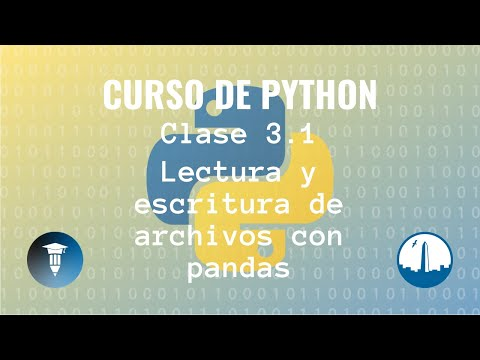

In [ ]:
# Link a Youtube: 
# Tema: Manejo de Archivos con pandas. 

from IPython.display import YouTubeVideo
YouTubeVideo('F1Uby9d5hes', width=800, height=450)

A continuación mostraremos un ejemplo donde se accede a la información de un archivo utilizando *pandas*. El archivo que leeremos se llama **Datos.xlsx**, normalmente desde nuestra computadora podremos acceder a los archivos locales mediante su ubicación en el disco. Colab requiere cargar los archivos a su entorno antes de poder usarlos, lo cual se puede realizar mediante el siguiente comando que descarga un archivo de internet:

In [ ]:
# Comando wget. Solo para maquinas Linux. Colab usa linux!
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/Datos.xlsx"


# Si no estamos en un entorno linux podemos definir nuestra propia wget
# Esta función nos ayuda a descargar archivos desde la web y no es necesaria para archivos locales
# No es necesario entender cómo funciona, se las mostramos sólo por si alguno llega a necesitarla

# Importamos la libreria requests
import requests

def wget(url):
    r = requests.get(url, allow_redirects=True)
    with open(url[url.rfind('/') + 1::], 'wb') as f:
        f.write(r.content)

wget("https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/Datos.xlsx")

La función que utilizaremos para cargar los datos del archivo se llama [read_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html). Esta función recibe como parámetro el nombre del archivo deseado. También existe la función [read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) y tiene un funcionamiento muy similar.

In [ ]:
import pandas as pd

archivo = pd.read_excel("Datos.xlsx") 
# La variable archivo es de un tipo de dato especial de pandas llamado 'DataFrame'
print(archivo)

Para poder utilizar la información que almacenamos en la variable de tipo DataFrame, necesitamos convertirla en un tipo conocido. Para esto podemos convertirla a un diccionario usando el método [to_dict()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_dict.html). Esta función recibe como parámetro el tipo de diccionario deseado, dependiendo de qué forma es preferible para organizar la información.

Los diseñadores de pandas les pusieron los siguientes nombres a distintos tipos de diccionarios:
*dict*, *list*, *series*, *split*, *records*, *index*

Vamos a ver algunos de estos tipos de diccionarios que son útiles:



In [ ]:
import pandas as pd

archivo = pd.read_excel("Datos.xlsx") 
data = archivo.to_dict("list") 
# "list" significa que vamos a almacenar a cada columna como una lista con su contenido

print(data)
print(data['Nombre'])     # Accedemos a los datos de una columna
print(data['Nombre'][2])  # Accedemos al índice 2 de la columna 'Nombres'

El parámetro "list" sirve para crear un diccionario donde en cada elemento la *clave* es el nombre de la columna y el *contenido* es una lista con los items de la columna correspondiente.

Cambiando el parámetro "list" por "records" de la función **to_dict()** podemos obtener una lista. Cada elemento de la lista es un diccionario. Cada uno de los diccionarios en la lista corresponde a una fila de la hoja de datos, en donde para cada elemento la *clave* es el nombre de la columna mientras que el *contenido* es 1 solo dato, el dato de la columna y fila correspondiente.

In [ ]:
import pandas as pd

archivo = pd.read_excel("Datos.xlsx") 

data = archivo.to_dict("records") 
# "records" significa que vamos a obtener el contenido separado por cada fila

print(data)
print(data[2])            # Accedemos a los datos de una fila
print(data[2]['Nombre'])  # Accedemos a la columna 'Nombres' de la fila con índice 2

A veces es necesario "indexar" el archivo por alguna columna en particular, en estos casos 
podemos agregar un parámetro *index_col* con el nombre de la columna que servirá de índice para los datos.
Es importante notar que la columna seleccionada no puede tener valores repetidos, ya que los datos de esta columna serán las claves del diccionario generado.

In [ ]:
import pandas as pd

# Indicamos que la columna de indexación será apellido.
archivo = pd.read_excel("Datos.xlsx", index_col ="Apellido") 
print(archivo)

data = archivo.to_dict("index") 
# "index" significa que vamos a obtener el contenido como diccionarios 
# donde la clave es algun campo de cada fila, en este caso la clave de los 
# diccionarios será la clave "Apellido"

# convertimos el tipo de dato de pandas a un dict de python

print(data)
print(data['Martinez'])           # Accedemos a los datos de una fila (usando el dato de índice apropiado)
print(data['Martinez']['Legajo']) # Accedemos a la columna 'Legajo' de la fila con índice 'Martinez'

Todo esto de hablar de filas y de columnas, crear diccionarios de listas, listas de diccionarios, es un poco confuso. Este es un buen momento para detenerse a revisar bien la estructura de datos que genera cada uno de los códigos anteriores. Es normal que si aprendieron a usar listas y diccionarios recientemente, todavía no sea muy fácil conceptualizar los tipos de datos anteriores y pensar en cuál conviene utilizar o cómo acceder al dato que necesito. La realidad es que hay que ganar un poco de práctica y cada vez se vuelve más simple, luego van a poder concentrarse en el proyecto que quieren crear y no tener que pensar cada detalle de listas y diccionarios.

### **Mini desafío 1.A**
Leer el archivo **Tabla1.xlsx** que contiene los puntos de un campeonato. El archivo tiene dos columnas, **Equipo** y **Puntos**. Determinar de cada equipo la diferencia de gol (goles a favor - goles en contra), y mostrar todas las diferencias de gol con **print**

In [ ]:
 ! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/Tabla1.xlsx"

### **Mini desafío 1.B** - Challenge

Leer el archivo **Tabla1.xlsx** que contiene los puntos de un campeonato y determinar qué equipo es el campeón (**1ro**) y perdedor (**último**). El archivo tiene dos columnas, **Equipo** y **Puntos**

## Escritura de archivos .xlsx .csv






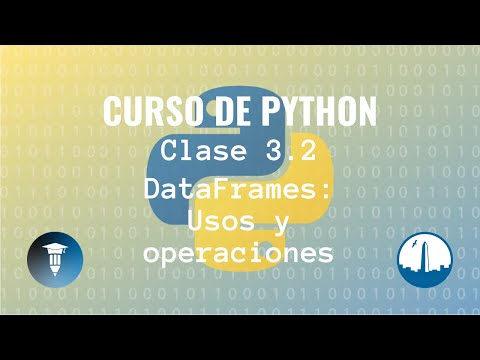

In [ ]:
# Link a Youtube: 
#Tema: Manejo de DataFrames. 

from IPython.display import YouTubeVideo
YouTubeVideo('56YRK_cphSU', width=800, height=450)       

Es posible escribir archivos con pandas utilizando el comando [to_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html). Este método recibe el tipo de datos de pandas llamado DataFrame por lo cual deberemos realizar una conversión con el método del mismo nombre: [DataFrame()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

A continuación mostraremos un ejemplo que genera la siguiente estructura de datos:

|   |     Personas     | Edad |
|---|:----------------:|-----:|
| 0 |  Analía Ferreyra |   25 |
| 1 |    Martin Hugo   |   35 |
| 2 | Fernando Lorenzo |   87 |


In [ ]:
import pandas as pd

# La clave es el titulo de la columna y el contenido son listas con los items de cada columna
data = {
    "Personas" : ["Analía Ferreyra" , "Martin Hugo", "Fernando Lorenzo"],
    "Edad" : [25, 35, 87] 
}

# Con pd.DataFrame podemos generar una variable tipo DataFrame
# Recordemos que DataFrame es el tipo de dato que usa pandas
dataFrame = pd.DataFrame(data) 

print(dataFrame)

# Exportamos la información a un archivo llamado "personas.xlsx"
dataFrame.to_excel("personas.xlsx") 

El archivo que genera el programa anterior tiene el siguiente aspecto:

<img src="https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/_assets/colab_archivos_3.png" width=400>

En Google Colab el archivo queda guardado en la pestaña *Archivos*. Si usan un entorno de desarrollo distinto el archivo será guardado en su disco de la computadora. Para ver el archivo generado pueden seguir los siguientes pasos:

<img src="https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/_assets/colab_archivos_2.png" width=400>




## **Uso de dataframes**


La librería pandas posee su propio tipo de datos para el manejo de información, el tipo DataFrame. Este tiene muchas operaciones y métodos de todo tipo. Sería muy aburrido explicar cada uno de ellos en detalle ya que varios son muy específicos, pero podrían ser la solución perfecta para un problema muy particular. A continuación veremos las operaciones más utilizadas, confiando en que si llegan a necesitar realizar operaciones más complejas puedan encontrarlas en la [documentación de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) o foros como StackOverflow.

In [ ]:
import pandas as pd

datos = pd.read_excel("Datos.xlsx") 
# la variable datos es un tipo de dato especial de pandas
print(datos)

Usualmente necesitamos acceder a los datos dispuestos en las columnas esto se hace de forma similar a un diccionario, la forma es la siguiente:

In [ ]:
columna = 'Quimica'
print(datos[columna])

Otra tarea común es acceder a una fila en particular, en el ejemplo sería acceder a un alumno en particular. Se puede lograr de la siguiente forma:

In [ ]:
indice = 0
alumno = datos.loc[indice] 
print(alumno)

*¿Por qué se usa .loc[indice] en vez de directamente usar corchetes?*

Normalmente se intenta que los operadores siempre signifiquen lo mismo, de forma que los corchetes deberían servir para acceder a un elemento, pero en este caso los corchetes ya se utilizan para acceder a una columna como en el ejemplo anterior, por lo cual se debe usar un operador distinto para acceder a una fila o serían indistinguibles.

Veamos ahora cómo se puede acceder a un dato en particular del alumno:

In [ ]:
indice = 0
alumno = datos.loc[indice] 
print(alumno['Matematica'])

### **Mini desafío 2.A**
Calcular el promedio de las notas de química de todos los alumnos en el archivo Datos.xlsx.

- **Tip:** Podemos usar la función **sum**($iterable$) para obtener la suma de todos los campos. Un ejemplo de como funciona:
```
mi_lista = [1, 2, 3, 4, 5]
total = sum(mi_lista)
print(total)
```
 ¡La función **len()** también sigue siendo válida!

### **Mini desafío 2.B**

Escribir una funcion que reciba como parámetros: una variable de tipo **DataFrame** (la tabla de alumnos) y el índice de un alumno. Luego debe devolver con *return* el promedio de sus notas en las diferentes materias.

## **Otras operaciones**




Veamos un ejemplo para sacar todos los promedios de los alumnos a la vez.

In [ ]:
promedios = (datos['Quimica'] + datos['Matematica'] + datos['Fisica']) / 3
print('Todos los promedios')
print(promedios)
print('El promedio maximo es',promedios.max())

Podemos ver que cuando se suman columnas de un DataFrame, se calcula la suma elemento a elemento, como si hiciera la operación suma para cada fila por separado. Cuando se divide por 3 la suma de las columnas, realiza la división por 3 de cada resultado por separado y queda al final 1 resultado por fila. Esto es muy práctico y también funciona con otros operadores, por lo cual se vuelve bastante intuitivo realizar cuentas sencillas.

También se muestra en el ejemplo el método **.max()** que encuentra el valor máximo.

### **Filtrado** 

En un DataFrame es posible filtrar los datos según alguna condición. Esto se realiza de la siguiente manera:
> variable**[** (condicion1) &/| (condicion2) &/| (condicion3) ...  **]**

Donde dice `&/|` es porque se puede elegir escribir `&` para hacer un **and**, o se puede escribir `|` para hacer un **or**.

Las condiciones siguien el siguiente formato: variable**[** propiedad **]** **>**/**<**/**<=**/**...** (número)

**Nota:** No debe ser una comparación sí o sí con un numero, se puede comparar contra cualquier cosa mientras se puedan cumplir esas condiciones (mayor, menor, mayor o igual, igual, etc.).

Veamos un ejemplo extrayendo todos los alumnos que hayan aprobado química (nota >= 4):

In [ ]:
import pandas as pd

datos = pd.read_excel("Datos.xlsx") 
print("Datos:")
print(datos)
aprobados = datos[datos['Quimica'] >= 4]
print("Aprobados en Química:")
print(aprobados)

Podemos hacer otro ejemplo en donde mostramos los alumnos que reprobaron al menos una materia, es decir que:

(la nota de Química es menor a 4) **ó** (la nota de Matemática es menor a 4) **ó** (la nota de Física es menor a 4)

In [ ]:
aprobados = datos[ (datos['Quimica'] < 4) | (datos['Matematica'] < 4) | (datos['Fisica'] < 4) ]
print("Reprobaron al menos una materia:")
print(aprobados)

#### **Mini desafío 3**

Obtener el promedio general sólo para aquellos alumnos que aprobaron Matematica.

### **Indexar los datos** 

Pandas tambien nos permite obtener los datos de forma que una columna sirva como índice, o como *clave*. Para eso cuando lo leemos le debemos decir la columna que queremos usar de indice. Esto es igual a lo que se utilizó anteriormente, pero trabajando directamente con DataFrames en lugar de convertirlo a una estructura de datos de Python:

> pd.read_excel('archivo', **index_col** = [índice])

Veamos un ejemplo:




In [ ]:
import pandas as pd

archivo = pd.read_excel("Datos.xlsx")
print(archivo)

print()

archivo = pd.read_excel("Datos.xlsx", index_col = 0)
print(archivo)

print()

# Es posible dar el nombre de la columna que se utilizará como indice
archivo = pd.read_excel("Datos.xlsx", index_col = "Legajo")
print(archivo)

Observen que ahora la primera columna en vez de ser 0,1,2,... son los legajos, esto nos permite acceder con .loc por legajo!

In [ ]:
print(archivo.loc[34567])

### **Nota final**

Esta libería nos permite simplificar el trabajo de convertir información de archivos a datos manejables por nuestro programa en gran medida. Mostramos algunos ejemplos elementales del uso de pandas, no obstante pueden conseguir la documentación oficial de pandas [aquí](http://pandas.pydata.org/pandas-docs/stable/). 

La habilidad de leer y entender la documentación  de librerías se adquiere con tiempo y experiencia. La información disponible es a veces mucha más de la necesaria y hace falta detectar lo que a uno le interesa, mientras que otras veces la información es insuficiente y es necesario investigar de otras fuentes y de otros programadores que hayan tenido problemas similares, estas habilidades son muy valoradas en la industria.

# Otro tipos de archivos (Información no estructurada)

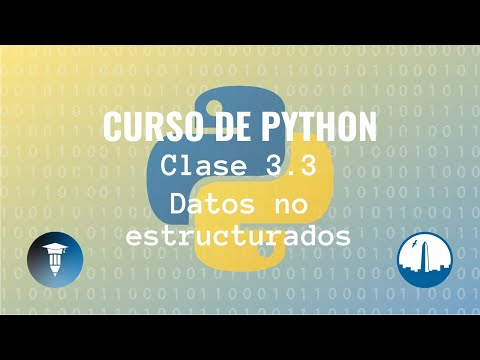

In [ ]:
# Link a Youtube: 
#Tema: Operaciones adicionales dataframes. 

from IPython.display import YouTubeVideo
YouTubeVideo('B-NzufQchds', width=800, height=450)  

A veces es necesario realizar un programa que pueda procesar información que se encuentra en un formato "particular", en tales casos necesitamos realizar un programa especializado.

El análisis de un texto es un ejemplo de un archivo para el cual necesitamos realizar una lectura en modo "manual". 

Imaginemos que se necesita leer un archivo .txt con una noticia del diario **The New York Times** y analizar su contenido. 

<img src="http://www.harfordcountyhealth.com/wp-content/uploads/2015/01/Newspaper.jpg" width=400>

El archivo es **noticia.txt**, lo importaremos al entorno de Google con el siguiente comando:

In [ ]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/noticia.txt"

En este caso abriremos el archivo con el comando **open( )** de python y guardamos el contenido "en bruto" en una lista de strings, separando por renglones.
Observen que no estamos utilizando librerías.

In [ ]:
file = open("noticia.txt") # Guardamos el contenido del archivo en una variable

contenido = file.readlines() # Obtenemos una lista de renglones
print(contenido)

for line in contenido: 
    print(line) # Mostramos renglón a renglón

Luego de poder almacenar el contenido, lo separaremos por palabras utilizando el método **.split()**

In [ ]:
palabras = []

for line in contenido:
    
    palabras_linea = line.split(' ') # Separamos por espacios
    
    for palabra in palabras_linea:   # por cada "string" separado por espacios
        palabras.append(palabra)

print(palabras)

¡Podemos observar que algunos carácteres no deseados se filtran entre las palabras (como '\ufeff' o '\n')! Es habitual que cuando analizemos un archivo a mano de manera "personalizada" ocurran esta clase de problemas, los cuales debemos resolver con algunos parches a nuestro programa. En este caso los carácteres no deseados que podemos observar a simple vista son **\ufeff**, **—**, **\n**, **’s**. Los caracteres que tienen la barra invertida *\* son llamados '*secuencias de escape*' o '*escape characters*' y se utilizan para definir ciertos caracteres especiales dentro de strings, por ejemplo '\n' es el caracter de nueva línea, esto vendría a ser lo que se almacena en memoria cuando apreto la tecla *Enter*. Los filtraremos utilizando el comando [replace](https://www.geeksforgeeks.org/python-string-replace/) de python:

In [ ]:
palabras = []

for line in contenido:
    
    # eliminamos los distintos carácteres no deseados uno por uno
    line = line.replace('\ufeff','')
    line = line.replace('—','')
    line = line.replace('\n','')
    line = line.replace('’s','')
    line = line.replace(',','')
    line = line.replace('.','')
   
    palabras_linea = line.split(' ') # separamos por espacios 
    
    for palabra in palabras_linea: # por cada "string" separado por espacios
      if palabra != '':
        palabras.append(palabra)

print(palabras)

Podríamos hacer el código un poco más simple con una lista de caracteres indeseados. Una idea muy útil es pasar todo el texto a mayúsculas para poder analizar el texto de manera más simple. Por ejemplo, si quiero buscar una palabra no tendré que analizar la posibilidad de que la primera letra sea mayúscula y el resto no.

In [ ]:
palabras = []
no_deseado = ['\ufeff', '—', '\n', '’s', ',', '.']

for line in contenido:
    
    # eliminamos los distintos carácteres no deseados uno por uno
    for caracter in no_deseado:
      line = line.replace(caracter,'')
   
    palabras_linea = line.split(' ') # separamos por espacios 
    
    for palabra in palabras_linea: # por cada "string" separado por espacios
      if palabra != '':
        palabras.append(palabra.upper()) # convertimos todo a mayuscula

print(palabras)

### **Mini desafío 4.A**
Encontrar la cantidad de ocurrencias de la palabras "**Trump**" y "**the**" en el texto de la noticia.

### **Mini desafío 4.B** - Challenge
Encontrar la palabra con mayor numero de ocurrencias en el texto de la noticia.

## Nota final

Es importante que sepan que si bien el uso de librerías simplifica en gran medida nuestros programas, y es una habilidad de gran relevancia saber utilizarlas, a veces pueden existir limitaciones de versatilidad en su uso y necesitaremos realizar un programa especifico para analizar nuestros datos. Es por esto que les presentamos estas distintas alternativas para analizar archivos.

# Para seguir aprendiendo...

Decidimos explicar los formatos de información estructurada más utilizados, pero como se pueden imaginar, existen muchos más formatos que se utilizan para diferentes tareas.

Como contenido extra, sólo para aquellos interesados en seguir investigando contenido relacionado, incluímos 2 Anexos al final de la clase que se relacionan con el formato *JSON*.

La lectura de los Anexos es **100% opcional** y NO es un requisito para continuar con el curso.

# Visualización de datos (próxima clase)



Poder manipular archivos, y en particular hojas de datos, es una tarea muy habitual y realizarlo mediante programación es mucho más poderoso que utilizando un programa como Excel. Sin embargo, observar los resultados del programa como un texto mostrado en pantalla, o como un archivo guardado en el disco no siempre es suficiente, muchas veces hará falta visualizar los datos de manera gráfica. En la próxima y última clase se dará una introducción a dos liberías relacionadas al tema que son de las más utilizadas, las cuales son **Numpy** y **matplotlib**, aquí tienen una pequeña descripción para que se vayan haciendo una idea:

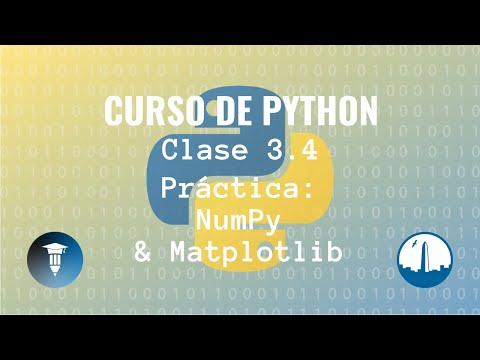

In [ ]:
# Link a Youtube: 
# Tema: Librerías de visualización de datos. 

from IPython.display import YouTubeVideo
YouTubeVideo('GNLeGD4dx2U', width=800, height=450)  

## **Numpy**
[Numpy](https://numpy.org/) (**Num**-ber **Py**-thon) es la libreria estándar de Python para trabajar con vectores y matrices. Extiende la funcionalidad de python permitiendo el uso de expresiones vectorizadas (tales como las de Matlab, competencia en el campo de cálculo cientifico)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/1200px-NumPy_logo.svg.png" width = 450>

## **Maplotlib**
[Matplotlib](https://matplotlib.org/) (**Mat**-h **Plot** **Lib**rary) es la libreria estandar de Python para realizar gráficos de diversos tipos. 

<img src="https://matplotlib.org/_static/logo2.png" width= 500>

<img src="https://s3.amazonaws.com/stackabuse/media/linear-regression-python-scikit-learn-1.png" width=300px>

<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/11/23_DensityPlot_With_Histogram_Matplotlib-min.png" width=300px>

<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/11/29_PyramidPlot_Matplotlib-min.png" width=300px>
<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/11/36_TimeSeries_Peaks_Troughs_Matplotlib-min.png" width=300px>



# Desafío final
Este desafío debe ser corregido automáticamente a través de [nuestro foro](https://ieeeitba.web.app/python), pueden realizar todos los intentos que deseen. En la página principal pueden ver un tutorial acerca de cómo se utiliza el corrector.

Les recomendamos primero probar su solución en Colab para luego realizar la corrección.

### Paréntesis balanceados

En este desafío deben programar un [linter](https://en.wikipedia.org/wiki/Lint_(software)) que verifique la correcta utilización de los paréntesis en un texto.

La entrada del programa será un texto, que puede o no contener paréntesis `()`, corchetes `[]` y llaves `{}`, además de cualquier otra letra o símbolo. Su tarea es determinar que el texto sea válido, lo cual en este caso quiere decir que la utilización de paréntesis, corchetes y llaves es correcta, cada símbolo de apertura se corresponde con uno de cierre. Imprimir True o False si el texto es válido o no.


**Tips:**
- Investigar el comportamiento de [Pilas LIFO](https://es.wikipedia.org/wiki/Pila_(inform%C3%A1tica)) ya que son de extrema utilidad en este problema. Pueden utilizar listas de Python con los comandos `append` y `pop` para que se comporte como una pila LIFO.
- Sugerimos usar una estructura de datos para determinar las parejas de símbolos, el código será más sencillo y además será mucho más fácil agregar otras parejas de símbolos en el futuro. Algunas opciones posibles que se nos ocurrieron, aunque no las únicas, son:
 - ```python
  openers = ['(', '{', '[']
  closers = [')', '}', ']']
  ```
 - ```python
  brackets = {'(':')', '[':']', '{':'}'}
  ```

**Ejemplos:**

- Cada paréntesis se cierra:

  ```python
  esBalanceado( "Yo (Juan) quiero (necesito) café." ) => True
  ```

- Cada símbolo se cierra en el orden correcto:

  ```python
  esBalanceado( " { 1-[ 2*( 3+4 ) ] } " ) => True
  ```

- Cada símbolo se cierra en el orden correcto:

  ```python
  esBalanceado( " [ [1,2,3], [4,5,6], [7,8,9] ] " ) => True
  ```
  
- Falta cerrar el corchete ``]``:

  ```python
  esBalanceado( " [1*(2+3) " ) => False
  ```

- Falta abrir la llave ``{``:

  ```python
  esBalanceado( " }[]() " ) => False
  ```

- Se cierran en el orden incorrecto, hay un ``]`` entre los ``( )``:

  ```python
  esBalanceado( " { [ ( ] ) } " ) => False
  ```


# Ejercitación integradora $\newcommand{\dif}{\bigstar}$$\newcommand{\facil}{\color{\green}{\dif}}$ $\newcommand{\pieceofcake}{\color{\cyan}{\dif}}$$\newcommand{\medio}{\color{\yellow}{\dif\dif}}$$\newcommand{\media}{\medio}$$\newcommand{\normal}{\medio}$  $\newcommand{\dificil}{\color{\orange}{\dif\dif\dif}}$ $\newcommand{\imposible}{\color{\red}{\dif\dif\dif\dif}}$


## $\facil$ Copy
*   ***Manejo de archivos***



Armar una función que copie un archivo *.xlsx*, y lo guarde como "Copia 1 - $nombre$", de ya existir debe guardarlo como Copia 2 -, Copia 3 - , ...

Usar la libreria **os** para chequear si existe el archivo:

Tips:

- os.path.exists($nombre$) devolverá True si ya existe

- Se puede importar con: `import os`



## $\facil$ Análisis de idiomas

*   ***Analísis de información no estructurada***


Importar el archivo **noticia.txt**

In [ ]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/noticia.txt"

Calcular la [frecuencia de aparición de letras](https://en.wikipedia.org/wiki/Letter_frequency). Compararla con la frecuencia de letras cáracteristica del idioma Inglés (En el articulo de wikipedia pueden encontrarla). ¿Existe alguna relación?

In [ ]:
file = open("noticia.txt") # cargamos el archivo a la memoria

contenido = file.readlines() # calculamos todas las lineas

## $\facil$ California Housing

*   ***Analísis de información estructurada***
*   ***Librerías***




Importar el archivo **california_housing_train.xlsx**. 

In [ ]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/california_housing_train.xlsx"

Este archivo contiene un conjunto de datos de viviendas de California, el cual fue extraido del censo de nacional de 1990. Para mas info sobre el set de datos: https://developers.google.com/machine-learning/crash-course/california-housing-data-description

Extraer la siguiente información:

*   ¿Cuantas casas hay con valor 'median_house_value' mayor a 80000 tomando de la longitud -120  a -118? Rta: 5466
*   ¿Cual es el promedio de habitaciones por manzana ('total_rooms') de estas casas? Rta: 2466.31

*   ¿Cual es la casa más cara? ¿Cuántas hay con este valor? Rta: 500001.0 - 814 

*   $\medio$ Obtener la media y la varianza de la propiedad 'median_house_value'. Rta: 207300.91 - 13451442293.57

**Tip:** ¡Pueden investigar funciones de numpy para conseguir la media y la varianza!  [numpy.var](https://docs.scipy.org/doc/numpy-1.6.0/reference/generated/numpy.var.html)

In [ ]:
import pandas as pd
import numpy as np

archivo = pd.read_excel("california_housing_train.xlsx") 


## $\medio$ Análisis estadístico de fallas en lotes de producción

*   ***Análisis de información estructurada***
*   ***Librerías***
*   ***Probabilidad y Estadística***


Una planta de producción de botellas plásticas fabrica 1000 lotes de botellas por día. Debido al proceso de fabricación algunas de las botellas salen falladas, estos fallos son detectados automáticamente durante el proceso de control de calidad y se cargan en una base de datos que registra la cantidad de productos fallados que fueron detectados por cada lote. El departamento de control de calidad sospecha que la cantidad de fallos por lote sigue una distribución de *Poisson*, pero todavía no conocen la media y la varianza.

Se pide importar los datos de los últimos 30 días (en total son 30000 datos) y calcular la *media*, la *varianza*, la *moda* y la *mediana* de la distribución de datos medidos (sin utilizar librerías de estadística). Los datos se encuentran en el archivo *ControlCalidadBotellas.csv* bajo la columna *Fallas*.

**Definiciones:**
- **Media:** El valor promedio:

  $\mu=\frac{X_1+X_2+X_3+\cdots+X_n}{n}$

- **Varianza:** El promedio de las distancias al cuadrado entre cada valor y la media:

  $\sigma^2=\frac{(X_1-\mu)^2+(X_2-\mu)^2+\cdots+(X_n-\mu)^2}{n}$

- **Moda:** El valor que ocurre con mayor frecuencia.

- **Mediana:** El valor que cumple la propiedad que la mitad de las veces el valor medido es menor a la mediana y la otra mitad de las veces es mayor.

Si las sospechas acerca de la distribución fueran correctas, entonces de acuerdo a las propiedades de la distribución de Poisson la media y la varianza deberían ser iguales, además la moda sería $\lceil{\mu}\rceil-1$
¿Esta sospecha les parece acertada?

\

**Tips:**
- Usando las librerías numpy y scipy se pueden realizar todo tipo de análisis de estadística sin tener que programar todo a mano! Este es sólo un ejercicio para practicar la manipulación de datos.

In [ ]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/ControlCalidadBotellas.csv"

## $\medio$ El tiempo es dinero

*   ***Analisís de información estructurada***
*   ***Librerías***



La administración del dinero es una tarea que requiere una altísima fiabilidad. 
En esta ocasión tu objetivo será programar un script que **actualize la cantidad** de dinero de una serie de usuarios a partir de la información de las transferencias que fueron realizadas. 
Más concretamente recibiras una **base de datos con la cantidad de dinero de una serie de usuarios**, un base de datos con una serie de transferencias que los usuarios se realizan entre si, y deberás generar con eso **una nueva base de datos con el dinero actualizado de cada usuario**.

*   Importar el archivo **Finanzas.xlsx** que contiene la cantidad de dinero de los usuarios y las transferencias en dos hojas de archivo.
*   Exportar un archivo **usuarios_actualizados.xlsx** que contiene las cantidades de dinero actualizadas.

In [ ]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/Finanzas.xlsx"

<img src="https://psmag.com/.image/t_share/MTI3NTgyMzg2MzE2NzAxNjY2/time-is-money.jpg" width=400>

Debes procesar las transferencias y actualizar el saldo de cada usuario (crear un nuevo archivo excel con los saldos actualizados)

In [ ]:
usuarios_archivo = pd.read_excel("Finanzas.xlsx", "Usuarios",index_col="Usuario") 
#leemos los usuarios "indexados" por su nombre

transferencias_archivo = pd.read_excel("Finanzas.xlsx", "Transferencias")

## $\dificil $ Buscando la $


*   ***Procesamiento de información estructurada***
*   ***Librerías***





Utilizando el set de datos del archivo **california_housing_train.xlsx**

Dividir el area cubierta por el censo en cuadrantes de 0.5 de latitud x 0.5  de longitud, encontrar para qué cuadrante el valor medio de 'median_house_value' es máximo. Asignar el paso como una variable para que pueda cambiarse facilmente. Para filtrar las zonas de muy baja residencia descarten los valores cuando hay menos de 100 casas

Datos utiles:
- Minimo de longitud: -124.3
- Máximo de longitud: -114.3
- Minimo de latitud: 32.5
- Máximo de latitud: 42.5

**Tips:** El programa va a tardar en correr, no se asusten! Pueden investigar funciones de numpy para ayudarlos a resolver el problema [numpy.arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html).

**Nota final**: Busquen en el mapa estas coordenadas para ver donde quedan! 

In [ ]:
import pandas as pd
import numpy as np

archivo = pd.read_excel("california_housing_train.xlsx") 
paso = .5

lats = np.arange(32.5,42.5,paso)
lons = np.arange(-124.3,113.3,paso) 
maximoValor = 0
maximaLat = 0
maximaLon = 0

## $\imposible $ Unificación de bases de datos

El objetivo de este problema es unificar dos bases de datos que contienen mails. Esto quiere decir, tomar dos bases de datos de formato *.csv*: **lista1.csv** y **lista2.csv** y combinarlas en una misma base de datos **listafinal.csv**. 
El contenido de las bases de datos son listas de mails, que contienen mails y otras informaciones de distintos usuarios. Tener en cuenta que las dos bases de datos pueden tener informaciones distintas de los usuarios.

**Recomendamos** descargar los archivos para ver su contenido (Con excel pueden abrirlos, pensar que un csv es prácticamente equivalente a un excel).


In [ ]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/lista1.csv" 
# primera lista de clientes

! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/lista2.csv"
# segunda lista de clientes

! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/lista_final.csv"
# ejemplo de como tiene que quedar (las columnas pueden quedar en otro orden! salvo la primera)

# Anexo A: JSON
La lectura de los Anexos es **100% opcional** y NO es un requisito para continuar con el curso.

*JSON* es un formato de representación de información estructurada que es de gran utilidad. Su sintaxis es simple y fácil de leer a simple vista, además de que tiene una gran similitud con la sintaxis propia de Python. En la [página web](https://www.json.org/json-es.html) de *JSON* hay explicaciones bastante claras acerca de los detalles de su sintaxis.

En *JSON* los objetos se rodean con llaves `{objeto}`, las listas con corchetes `[lista]` y los strings con comillas dobles `"string"`. Por el momento se puede pensar que un objeto es igual a un diccionario de Python, pudiendo almacenar datos con claves, por ejemplo:

```json
{  
  "columna_1": [1,8,4,6,2,8,5],
  "columna_2": [99,56,223,301,56, 2],
  "columna_2": [0,-1,-66,-210,-333,334]
}
```

El texto de arriba es código de Python _válido_ y un objeto json! Si quisieramos cargarlo a nuestro código Python bastaría con copiarlo y pegarlo a nuestro código. Pero no siempre vamos a estar nosotros para copiar y pegar el texto json. 

En el caso presentado a continuación se tiene un string de código json y precisamos [leerlo y procesarlo](https://www.w3schools.com/python/python_json.asp). Para eso usamos el modulo `json` de Python. A continuación se muestra un ejemplo:

In [ ]:
import json
s = ' { "a":[1,2,3], "b":[4,6,8], "c":[99,98,97] } '
d= json.loads(s)
print(d["a"])
print(len(d["b"]))
print(sum(d["c"]))

Verán que se imprimen la lista `"a"`, la longitud de la lista `"b"` y la suma de los elementos de la lista `"c"`.

Vamos a utilizar en el próximo desafío **opcional** la librería `json` para leer el texto que nos llega por `input()`, lo cual podría ocurrir si estamos comunicándonos con un servidor.

### **Opcional**: Mini-desafío json
Estás encargado de un servidor con millones de usuarios. 

Se pide escribir un programa que reciba el email y contraseña del usuario y se fije si existe el usuario y si coincide la contraseña.

Se tienen datos encolumnados en formato json que nos llegan del siguiente formato:
```json
{
	"usuarios": ["mica@mail.co", "jerry@gma.com","alber@soup.co"],
	"contra": ["abc123","caballitos","yoloswag"]
}
```
La entrada del programa son tres lineas, el programa entonces va tener tres `input()`. La primer linea contiene el `json`, la segunda el `email` a verificar, y la tercera la `contraseña`. Por ende, las primeras lineas de su programa podrían ser:
```python
import json
usuarios = json.loads(input())
email = input()
password = input()
```

La salida del programa será `OK` si el usuario **se encuentra en la base de datos** ***y*** **si coincide la contraseña**, imprimimos `DNE` (does not exist) si el usuario no existe y `NO` en cualquier otro caso.

#### Caso ejemplo
**Entrada**:
```plaintext
{"usuarios": ["mica@mail.co","jerry@gma.com","alber@soup.co"],"contra": ["abc123","caballitos","yoloswag"]}
mica@mail.co
caballitos
```
El usuario existe y la contraseña también... pero no le corresponde la contraseña `caballitos` al usuario `mica@mail.co` (la contraseña de `mica@mail.co` sería `abc123`) por ende imprimimos:

**Salida**
```
NO
```

_Considere que no hay usuarios repetidos_.

# Anexo B: API's
La lectura de los Anexos es **100% opcional** y NO es un requisito para continuar con el curso.

En este curso, uno de los objetivos es poder automatizar tareas comunes. Ya empezamos a ver como podemos interactuar con archivos de datos desde nuestro programa en Python, pero esto puede no ser suficiente. Es usual tener que interactuar con una aplicación desde nuestro programa, por ejemplo, nuestro programa podría querer acceder a una página web, o al servidor de nuestra empresa. Para lograr la interacción entre una aplicación y nuestro programa se utilizan API's (Application Programming Interface) las cuales permiten estandarizar el formato de la información que se intercambia. Para lograr esta comunicación una de las herramientas más comunes es el uso de archivos *JSON* ya que de manera simple y concisa pueden representar estructuras de datos relativamente complejas. No todas las aplicaciones tendrán API's ya que depende de su creador programar esta interfaz o no, además, no todas las API's proveen el acceso a todos los datos deseados por lo cual es posible que haya que recurrir a otros métodos menos elegantes para obtener la información deseada.

[Este video](https://youtu.be/BxV14h0kFs0) hecho por Tom Scott puede ayudar para comprender un poco más acerca de qué se tratan las API's.

Para mostrar un ejemplo práctico del uso de API's, utilizamos uno de los códigos de ejemplo en la documentación de la API de YouTube que pueden ver en [este link](https://developers.google.com/youtube/reporting/v1/code_samples/python?hl=es#retrieve_daily_channel_statistics). Las aplicaciones de Google (Maps, Youtube, etc.) suelen tener API's relativamente buenas y completas. En este caso el ejemplo obtiene ciertas estadísticas del [Canal de YouTube de IEEE-ITBA](https://www.youtube.com/channel/UCpWHvOSiPtDIwIw8Tb_9g6A/featured) entre los días 1 y 13 del mes de octubre. Los resultados **reales** de este programa se muestran a continuación tal cual como fueron enviados por la API de YouTube y recibidos por nuestro programa en Python:

```json
{
    "columnHeaders": [
        {
            "columnType": "DIMENSION",
            "dataType": "STRING",
            "name": "day"
        },
        {
            "columnType": "METRIC",
            "dataType": "INTEGER",
            "name": "estimatedMinutesWatched"
        },
        {
            "columnType": "METRIC",
            "dataType": "INTEGER",
            "name": "views"
        },
        {
            "columnType": "METRIC",
            "dataType": "INTEGER",
            "name": "likes"
        },
        {
            "columnType": "METRIC",
            "dataType": "INTEGER",
            "name": "subscribersGained"
        }
    ],
    "kind": "youtubeAnalytics#resultTable",
    "rows": [
        [
            "2020-10-01",
            26,
            19,
            0,
            0
        ],
        [
            "2020-10-02",
            2,
            14,
            0,
            0
        ],
        [
            "2020-10-03",
            120,
            78,
            0,
            1
        ],
        [
            "2020-10-04",
            3280,
            1203,
            75,
            88
        ],
        [
            "2020-10-05",
            2064,
            747,
            22,
            44
        ],
        [
            "2020-10-06",
            2290,
            824,
            28,
            26
        ],
        [
            "2020-10-07",
            2817,
            950,
            13,
            20
        ],
        [
            "2020-10-08",
            4594,
            1491,
            9,
            14
        ],
        [
            "2020-10-09",
            4238,
            1254,
            17,
            19
        ],
        [
            "2020-10-10",
            31783,
            3231,
            126,
            102
        ],
        [
            "2020-10-11",
            6233,
            1529,
            18,
            22
        ],
        [
            "2020-10-12",
            4786,
            1138,
            9,
            7
        ],
        [
            "2020-10-13",
            3977,
            761,
            17,
            13
        ]
    ]
}
```

Como se puede observar, el formato de los datos está definido por la API de YouTube, y consiste de una lista ```columnHeaders``` con los datos de cada columna, como por ejemplo el nombre de la columna, y luego una lista ```rows``` con los datos de cada fila en el mismo orden en que se indicaron las columnas.

Usando la API de YouTube, por ejemplo, se puede automatizar el análisis de las estadísticas de videos e incluso realizar cambios acordemente para mejorar su rendimiento, como por ejemplo cambiar el título, la imagen de portada, o realizar cualquier análisis personalizado.

Usando la API de Google Maps se puede llegar a incorporar funcionalidad de mapas o de geolocalización a nuestra aplicación.

En conclusión, las API's nos permiten interactuar desde nuestro programa con otras aplicaciones de forma simple y estandarizada para aprovechar todas las herramientas que nos ofrecen, y automatizar este proceso utilizando Python.

